## Load and Preview Dataset

We begin by loading the BLS dataset and inspecting its structure. This helps us understand the available columns, identify relevant features, and determine how to clean or transform the data for analysis.

In [1]:
import pandas as pd

# Load the dataset
file_path = "all_data_M_2024.xlsx"
bls_df = pd.read_excel(file_path)

# Preview first few rows
bls_df.head()

AREA AREA_TITLE  AREA_TYPE PRIM_STATE   NAICS     NAICS_TITLE  \
0    99       U.S.          1         US  000000  Cross-industry   
1    99       U.S.          1         US  000000  Cross-industry   
2    99       U.S.          1         US  000000  Cross-industry   
3    99       U.S.          1         US  000000  Cross-industry   
4    99       U.S.          1         US  000000  Cross-industry   

          I_GROUP  OWN_CODE OCC_CODE               OCC_TITLE  ... H_MEDIAN  \
0  cross-industry      1235  00-0000         All Occupations  ...     23.8   
1  cross-industry      1235  11-0000  Management Occupations  ...     58.7   
2  cross-industry      1235  11-1000          Top Executives  ...    50.48   
3  cross-industry      1235  11-1010        Chief Executives  ...    99.24   
4  cross-industry      1235  11-1011        Chief Executives  ...    99.24   

  H_PCT75 H_PCT90 A_PCT10 A_PCT25 A_MEDIAN A_PCT75 A_PCT90 ANNUAL HOURLY  
0   37.89   60.44   29990   36730    49500   78810  125720    NaN    NaN  
1    82.5       #   57010   79900   122090  171610       #    NaN    NaN  
2   81.01       #   47510   68800   104990  168490       #    NaN    NaN  
3       #       #   73710  126080   206420       #       #    NaN    NaN  
4       #       #   73710  126080   206420       #       #    NaN    NaN  

[5 rows x 32 columns]

In [2]:
# List all sheet names
pd.ExcelFile(file_path).sheet_names

['All May 2024 data', 'Field Descriptions', 'UpdateTime', 'Filler']

In [3]:
bls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409517 entries, 0 to 409516
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          409517 non-null  int64 
 1   AREA_TITLE    409517 non-null  object
 2   AREA_TYPE     409517 non-null  int64 
 3   PRIM_STATE    409517 non-null  object
 4   NAICS         409517 non-null  object
 5   NAICS_TITLE   409517 non-null  object
 6   I_GROUP       409517 non-null  object
 7   OWN_CODE      409517 non-null  int64 
 8   OCC_CODE      409517 non-null  object
 9   OCC_TITLE     409517 non-null  object
 10  O_GROUP       409517 non-null  object
 11  TOT_EMP       409517 non-null  object
 12  EMP_PRSE      409517 non-null  object
 13  JOBS_1000     231693 non-null  object
 14  LOC_QUOTIENT  231693 non-null  object
 15  PCT_TOTAL     170758 non-null  object
 16  PCT_RPT       170758 non-null  object
 17  H_MEAN        409517 non-null  object
 18  A_MEAN        409517 non

### Understanding OCC_CODE Categories (SOC Major Groups)

The `OCC_CODE` field in the BLS dataset follows the **Standard Occupational Classification (SOC)** system. The **first two digits** indicate the **major occupational group**. These categories help classify and analyze labor data across all industries.

Below is the complete list of **23 SOC Major Groups**, along with example roles and general fields:

| OCC_CODE Prefix | Major Occupational Group                                      | Common Fields / Example Roles                            |
|-----------------|---------------------------------------------------------------|-----------------------------------------------------------|
| **11**          | Management Occupations                                        | Executives, Project Managers, Operations Directors        |
| **13**          | Business and Financial Operations Occupations                 | Financial Analysts, HR Specialists, Compliance Officers   |
| **15**          | Computer and Mathematical Occupations                         | Software Developers, Data Scientists, Statisticians       |
| **17**          | Architecture and Engineering Occupations                      | Civil Engineers, Mechanical Engineers, Systems Architects |
| **19**          | Life, Physical, and Social Science Occupations                | Chemists, Economists, Environmental Scientists            |
| **21**          | Community and Social Service Occupations                      | Social Workers, Counselors, Health Educators              |
| **23**          | Legal Occupations                                              | Lawyers, Paralegals, Judges                               |
| **25**          | Education, Training, and Library Occupations                  | Teachers, Librarians, Instructional Designers             |
| **27**          | Arts, Design, Entertainment, Sports, and Media Occupations    | UX Designers, Journalists, Musicians                      |
| **29**          | Healthcare Practitioners and Technical Occupations            | Physicians, Registered Nurses, Medical Technologists      |
| **31**          | Healthcare Support Occupations                                | Medical Assistants, Home Health Aides                     |
| **33**          | Protective Service Occupations                                | Police Officers, Firefighters, Security Guards            |
| **35**          | Food Preparation and Serving Related Occupations              | Chefs, Cooks, Servers                                     |
| **37**          | Building and Grounds Cleaning and Maintenance Occupations     | Janitors, Groundskeepers, Pest Control Workers            |
| **39**          | Personal Care and Service Occupations                         | Childcare Workers, Hairstylists, Fitness Trainers         |
| **41**          | Sales and Related Occupations                                 | Retail Salespersons, Real Estate Agents, Sales Engineers  |
| **43**          | Office and Administrative Support Occupations                 | Administrative Assistants, Clerks, Dispatchers            |
| **45**          | Farming, Fishing, and Forestry Occupations                    | Agricultural Workers, Fishers, Loggers                    |
| **47**          | Construction and Extraction Occupations                       | Carpenters, Electricians, Heavy Equipment Operators        |
| **49**          | Installation, Maintenance, and Repair Occupations             | Mechanics, HVAC Technicians, IT Repair Specialists        |
| **51**          | Production Occupations                                        | Assemblers, Machinists, Tool Operators                    |
| **53**          | Transportation and Material Moving Occupations                | Truck Drivers, Pilots, Package Handlers                   |
| **55**          | Military Specific Occupations                                 | Enlisted Personnel, Officers, Combat Roles                |

This classification is helpful for:
- Grouping similar occupations
- Understanding trends by category
- Feature engineering (e.g., using `OCC_MAJOR` in modeling)

**Reference**: [Bureau of Labor Statistics – SOC Major Groups](https://www.bls.gov/soc/2018/major_groups.htm)

### Combined Filtering by SOC Group and Tech Keywords

To create a clean, tech-focused dataset, we applied two layers of filtering:
1. **SOC Group Filtering**: We retained only major occupation groups relevant to tech, such as Computer & Mathematical, Engineering, and IT Management (OCC_CODE prefixes 11, 13, 15, 17, etc.).
2. **Keyword Filtering**: We further filtered job titles using tech-related keywords such as “developer,” “engineer,” “data,” “IT,” and “cyber.”

This dual-filter approach ensures our model is trained on relevant job types while excluding unrelated roles from other industries.

In [8]:
import re

# List of keywords commonly found in tech-related occupations
tech_keywords = r'\b(?:software|developer|computer|data|it|information|technology|programmer|engineer|web|cyber|network|systems|cloud|security|analyst|devops|ai|ml|machine learning)\b'

In [16]:
# Extract OCC_MAJOR (first 2 digits of OCC_CODE)
bls_df['OCC_MAJOR'] = bls_df['OCC_CODE'].astype(str).str[:2]

# Keep only rows where OCC_MAJOR is tech-relevant
tech_major_codes = ['11', '13', '15', '17', '19', '27', '41', '49', '51']
filtered_by_group = bls_df[bls_df['OCC_MAJOR'].isin(tech_major_codes)]

# Now apply keyword filtering on OCC_TITLE
filtered_tech_df = filtered_by_group[
    filtered_by_group['OCC_TITLE'].str.lower().str.contains(tech_keywords, regex=True, na=False)
]

# Exclude unrelated titles manually
excluded_keywords = r'\b(?:assembler|rigging|machinist|mechanic|welder|fabricator|operator|repairer|driller|inspector)\b'

filtered_tech_df = filtered_tech_df[
    ~filtered_tech_df['OCC_TITLE'].str.lower().str.contains(excluded_keywords, regex=True, na=False)
]

print(f"Filtered down to {filtered_tech_df.shape[0]} rows after applying SOC group and keyword filters.")

Filtered down to 17398 rows after applying SOC group and keyword filters.


In [17]:
filtered_tech_df.head()

AREA AREA_TITLE  AREA_TYPE PRIM_STATE   NAICS     NAICS_TITLE  \
22     99       U.S.          1         US  000000  Cross-industry   
23     99       U.S.          1         US  000000  Cross-industry   
132    99       U.S.          1         US  000000  Cross-industry   
133    99       U.S.          1         US  000000  Cross-industry   
134    99       U.S.          1         US  000000  Cross-industry   

            I_GROUP  OWN_CODE OCC_CODE  \
22   cross-industry      1235  11-3020   
23   cross-industry      1235  11-3021   
132  cross-industry      1235  15-0000   
133  cross-industry      1235  15-1200   
134  cross-industry      1235  15-1210   

                                     OCC_TITLE  ... H_PCT75 H_PCT90 A_PCT10  \
22   Computer and Information Systems Managers  ...  103.95       #  104450   
23   Computer and Information Systems Managers  ...  103.95       #  104450   
132      Computer and Mathematical Occupations  ...   70.51   86.59   54100   
133                       Computer Occupations  ...   70.78   86.59   53340   
134          Computer and Information Analysts  ...   65.96   81.76   64450   

    A_PCT25 A_MEDIAN A_PCT75 A_PCT90 ANNUAL HOURLY OCC_MAJOR  
22   134350   171200  216220       #    NaN    NaN        11  
23   134350   171200  216220       #    NaN    NaN        11  
132   76350   105850  146650  180110    NaN    NaN        15  
133   76180   105990  147220  180110    NaN    NaN        15  
134   82550   106890  137190  170060    NaN    NaN        15  

[5 rows x 33 columns]

In [18]:
filtered_tech_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17398 entries, 22 to 406768
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AREA          17398 non-null  int64 
 1   AREA_TITLE    17398 non-null  object
 2   AREA_TYPE     17398 non-null  int64 
 3   PRIM_STATE    17398 non-null  object
 4   NAICS         17398 non-null  object
 5   NAICS_TITLE   17398 non-null  object
 6   I_GROUP       17398 non-null  object
 7   OWN_CODE      17398 non-null  int64 
 8   OCC_CODE      17398 non-null  object
 9   OCC_TITLE     17398 non-null  object
 10  O_GROUP       17398 non-null  object
 11  TOT_EMP       17398 non-null  object
 12  EMP_PRSE      17398 non-null  object
 13  JOBS_1000     8321 non-null   object
 14  LOC_QUOTIENT  8321 non-null   object
 15  PCT_TOTAL     8889 non-null   object
 16  PCT_RPT       8889 non-null   object
 17  H_MEAN        17398 non-null  object
 18  A_MEAN        17398 non-null  object
 19  MEAN_PR

In [19]:
filtered_tech_df['OCC_TITLE'].nunique()

29

In [20]:
sorted(filtered_tech_df['OCC_TITLE'].dropna().unique())[:20]

['Computer Hardware Engineers',
 'Computer Network Architects',
 'Computer Network Support Specialists',
 'Computer Numerically Controlled Tool Operators',
 'Computer Numerically Controlled Tool Operators and Programmers',
 'Computer Numerically Controlled Tool Programmers',
 'Computer Occupations',
 'Computer Occupations, All Other',
 'Computer Programmers',
 'Computer Support Specialists',
 'Computer Systems Analysts',
 'Computer User Support Specialists',
 'Computer and Information Analysts',
 'Computer and Information Research Scientists',
 'Computer and Information Systems Managers',
 'Computer and Mathematical Occupations',
 'Computer, Automated Teller, and Office Machine Repairers',
 'Data Scientists',
 'Database and Network Administrators and Architects',
 'Electronics Engineers, Except Computer']

### Identifying Missing Values

Before moving forward with modeling, it's important to understand where missing data exists in our tech-filtered dataset. This step helps us decide whether to drop rows, impute values, or take other precautions to avoid skewed results.

In [21]:
# Count missing values in each column
missing_summary = filtered_tech_df.isnull().sum().sort_values(ascending=False)
missing_summary[missing_summary > 0]

HOURLY          17398
ANNUAL          17398
LOC_QUOTIENT     9077
JOBS_1000        9077
PCT_RPT          8509
PCT_TOTAL        8509
dtype: int64

### Missing Value Summary

We found that a handful of columns have missing values, most notably:
- `HOURLY` and `ANNUAL`: missing in **100%** of rows (these may be placeholder or deprecated columns)
- `LOC_QUOTIENT`, `JOBS_1000`, `PCT_RPT`, and `PCT_TOTAL`: missing in ~50% of rows

These fields are primarily used for **contextual labor metrics** rather than salary prediction and may be candidates for removal.

In [22]:
# Calculate percentage of missing values for each column
missing_percent = (filtered_tech_df.isnull().mean() * 100).sort_values(ascending=False)
missing_percent[missing_percent > 0]

HOURLY          100.000000
ANNUAL          100.000000
LOC_QUOTIENT     52.172664
JOBS_1000        52.172664
PCT_RPT          48.907920
PCT_TOTAL        48.907920
dtype: float64

### Interpreting Missing Value Percentages

The `HOURLY` and `ANNUAL` columns are entirely empty (100% missing), suggesting they are either deprecated or irrelevant for this dataset release. The `LOC_QUOTIENT`, `JOBS_1000`, `PCT_RPT`, and `PCT_TOTAL` fields are missing in roughly 50% of the data and are mostly auxiliary labor market indicators.

These columns are not directly tied to our salary prediction target (`A_MEDIAN`), so removing them — or the rows they appear in — is unlikely to significantly impact the core model performance.

In [23]:
# Store original row count
original_count = filtered_tech_df.shape[0]

# Drop rows with any missing values
tech_df_cleaned = filtered_tech_df.dropna()

# Report how much data was dropped
cleaned_count = tech_df_cleaned.shape[0]
print(f"Original: {original_count} rows")
print(f"After dropping nulls: {cleaned_count} rows")
print(f"Rows dropped: {original_count - cleaned_count} ({(original_count - cleaned_count)/original_count:.2%})")

Original: 17398 rows
After dropping nulls: 0 rows
Rows dropped: 17398 (100.00%)


### Strategy Update: Column-Wise Cleaning First

Dropping all rows with missing values would eliminate the entire dataset. This is because two unused columns — `HOURLY` and `ANNUAL` — are 100% missing.

Since these columns are not used in our salary prediction task, we will drop them from the dataset first. This allows us to then evaluate missing values in the remaining, more relevant fields without losing all our data.

In [24]:
# Drop unused columns that are 100% missing
tech_df_cleaned = filtered_tech_df.drop(columns=['HOURLY', 'ANNUAL'])

# Check remaining missing values
tech_df_cleaned.isnull().sum()

AREA               0
AREA_TITLE         0
AREA_TYPE          0
PRIM_STATE         0
NAICS              0
NAICS_TITLE        0
I_GROUP            0
OWN_CODE           0
OCC_CODE           0
OCC_TITLE          0
O_GROUP            0
TOT_EMP            0
EMP_PRSE           0
JOBS_1000       9077
LOC_QUOTIENT    9077
PCT_TOTAL       8509
PCT_RPT         8509
H_MEAN             0
A_MEAN             0
MEAN_PRSE          0
H_PCT10            0
H_PCT25            0
H_MEDIAN           0
H_PCT75            0
H_PCT90            0
A_PCT10            0
A_PCT25            0
A_MEDIAN           0
A_PCT75            0
A_PCT90            0
OCC_MAJOR          0
dtype: int64

### Final Cleaning: Dropping Contextual Columns with Missing Values

After removing the 100% missing columns (`HOURLY`, `ANNUAL`), we reviewed the remaining null values. Only four columns still had missing data: `JOBS_1000`, `LOC_QUOTIENT`, `PCT_TOTAL`, and `PCT_RPT`.

These are contextual labor metrics not required for our salary prediction task. To preserve data integrity and avoid row-level loss, we opted to drop these columns rather than impute or remove rows.

In [25]:
# Drop remaining columns with missing values (not essential for modeling)
cols_to_drop = ['JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT']
tech_df_cleaned = tech_df_cleaned.drop(columns=cols_to_drop)

# Confirm no missing values remain
tech_df_cleaned.isnull().sum().sum()

0

### Validating Dataset Integrity After Cleaning

Now that we’ve dropped non-essential columns with missing data, we compare the cleaned dataset to the original filtered version. We focus on the distribution of salaries and the diversity of job titles to ensure we didn’t unintentionally lose valuable information.

In [26]:
print("Unique job titles before cleaning:", filtered_tech_df['OCC_TITLE'].nunique())
print("Unique job titles after cleaning:", tech_df_cleaned['OCC_TITLE'].nunique())

Unique job titles before cleaning: 29
Unique job titles after cleaning: 29


In [28]:
# Ensure A_MEDIAN is numeric
filtered_tech_df['A_MEDIAN'] = pd.to_numeric(filtered_tech_df['A_MEDIAN'], errors='coerce')
tech_df_cleaned['A_MEDIAN'] = pd.to_numeric(tech_df_cleaned['A_MEDIAN'], errors='coerce')

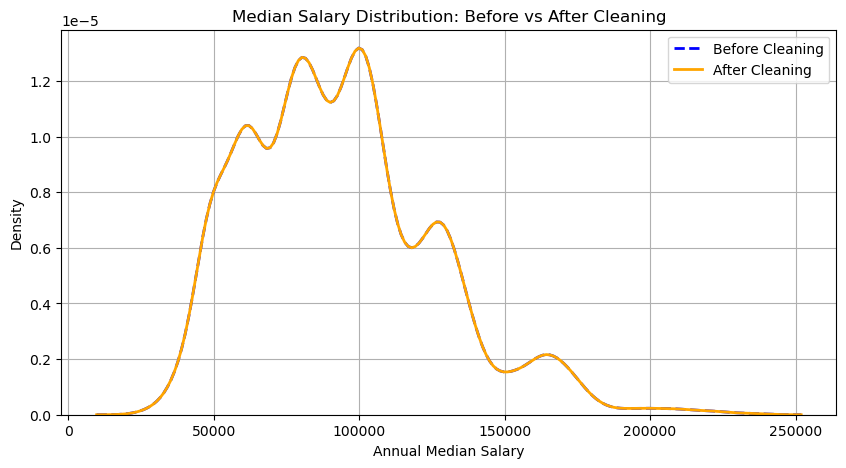

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Before Cleaning - blue dashed line
sns.kdeplot(
    filtered_tech_df['A_MEDIAN'].dropna(),
    label='Before Cleaning',
    color='blue',
    linestyle='--',
    linewidth=2
)

# After Cleaning - orange solid line
sns.kdeplot(
    tech_df_cleaned['A_MEDIAN'].dropna(),
    label='After Cleaning',
    color='orange',
    linestyle='-',
    linewidth=2
)

plt.title('Median Salary Distribution: Before vs After Cleaning')
plt.xlabel('Annual Median Salary')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

### Salary Distribution Comparison: Before vs After Cleaning

To validate our data cleaning steps, we compared the distribution of median annual salaries (`A_MEDIAN`) before and after removing non-essential columns with missing values.

As shown in the KDE plot, the shape and range of the distribution remain consistent, confirming that we did not lose valuable salary insights during the cleaning process. This reassures us that our dataset is still representative and suitable for modeling.

In [32]:
# Drop rows where A_MEAN or H_MEAN is missing
tech_df_cleaned = tech_df_cleaned.dropna(subset=['A_MEAN', 'H_MEAN']).reset_index(drop=True)
print("Cleaned tech dataset shape:", tech_df_cleaned.shape)

Cleaned tech dataset shape: (17398, 27)


### Filtering Rows with Missing Wage Data

To ensure meaningful salary analysis, we keep only rows where average annual (`A_MEAN`) and hourly (`H_MEAN`) wage data is available. This reduces the dataset while preserving relevant information.

In [35]:
# Drop rows with missing average annual or hourly wage
tech_df_cleaned = tech_df_cleaned.dropna(subset=['A_MEAN', 'H_MEAN']).reset_index(drop=True)

# List of wage-related columns
wage_columns = [
    'A_MEAN', 'H_MEAN', 'MEAN_PRSE',
    'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
    'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'
]

# Double-check column types (optional)
print(tech_df_cleaned[wage_columns].dtypes)

A_MEAN       float64
H_MEAN       float64
MEAN_PRSE    float64
H_PCT10      float64
H_PCT25      float64
H_MEDIAN     float64
H_PCT75      float64
H_PCT90      float64
A_PCT10      float64
A_PCT25      float64
A_MEDIAN     float64
A_PCT75      float64
A_PCT90      float64
dtype: object


### Wage Columns Converted

All selected wage-related columns have been successfully converted to numeric format. This allows for accurate statistical analysis, plotting, and modeling.

### Distribution of Annual Median Wages
This plot shows the distribution of annual median wages (A_MEDIAN) across tech occupations. It helps identify common salary ranges, skewness, and potential outliers in the dataset.

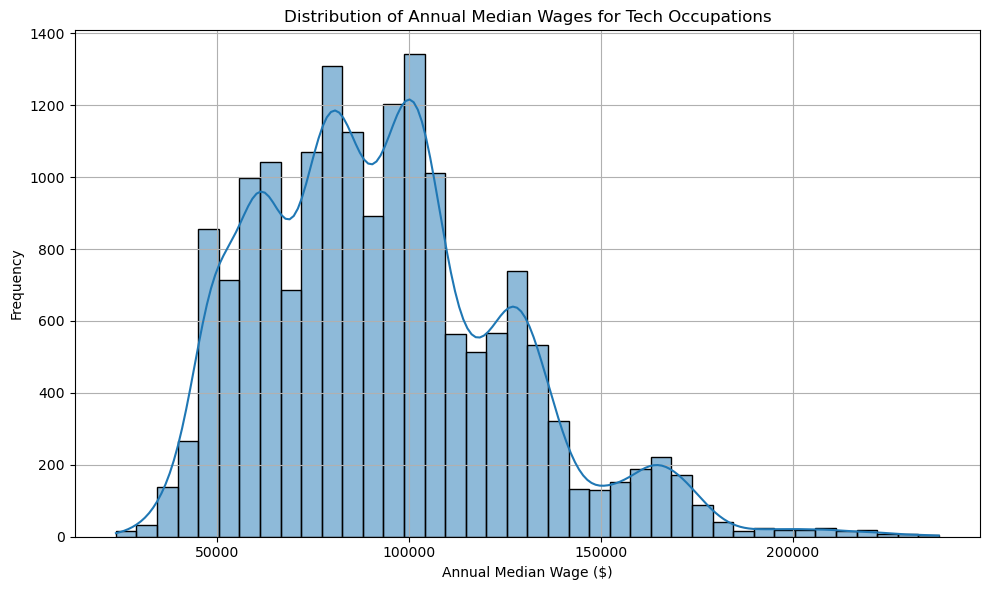

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(tech_df_cleaned['A_MEDIAN'], bins=40, kde=True)
plt.title('Distribution of Annual Median Wages for Tech Occupations')
plt.xlabel('Annual Median Wage ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

### Top 15 Highest-Paying Tech Occupations  
This bar chart displays the tech occupations with the highest median annual wages.  
It highlights roles with the most lucrative compensation based on `A_MEDIAN` values aggregated by occupation title.

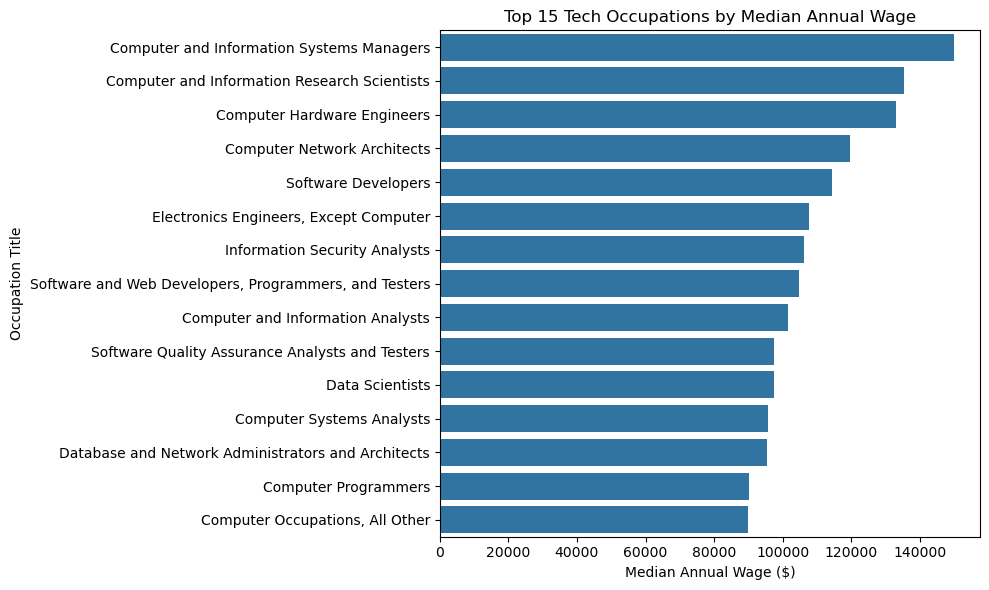

In [37]:
top_jobs = (
    tech_df_cleaned[['OCC_TITLE', 'A_MEDIAN']]
    .groupby('OCC_TITLE')
    .median()
    .sort_values('A_MEDIAN', ascending=False)
    .head(15)
)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_jobs.index, x=top_jobs['A_MEDIAN'])
plt.title('Top 15 Tech Occupations by Median Annual Wage')
plt.xlabel('Median Annual Wage ($)')
plt.ylabel('Occupation Title')
plt.tight_layout()
plt.show()

### Job Role Distribution

We examine how frequently different tech roles appear in the dataset. This helps us understand which occupations are more represented across the U.S. in the BLS data.

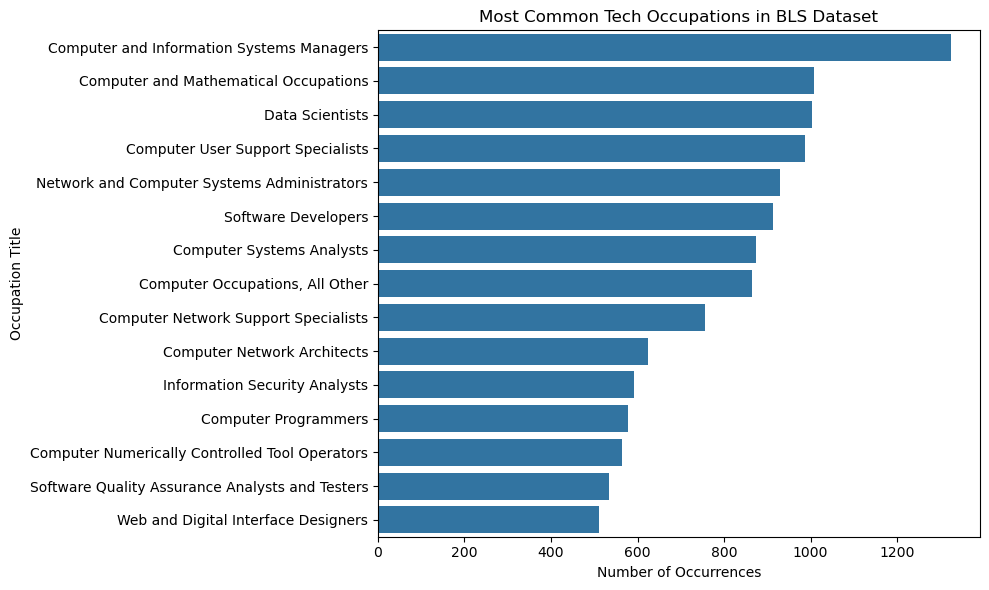

In [38]:
top_roles = (
    tech_df_cleaned['OCC_TITLE']
    .value_counts()
    .head(15)
)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_roles.index, x=top_roles.values)
plt.title('Most Common Tech Occupations in BLS Dataset')
plt.xlabel('Number of Occurrences')
plt.ylabel('Occupation Title')
plt.tight_layout()
plt.show()

### Salary Distribution by SOC Major Group (Labeled & Sorted)  
This enhanced boxplot replaces numeric SOC codes with descriptive group labels and focuses on higher-paying tech-related categories. Sorting by median wage helps visually compare compensation across these occupational groups.

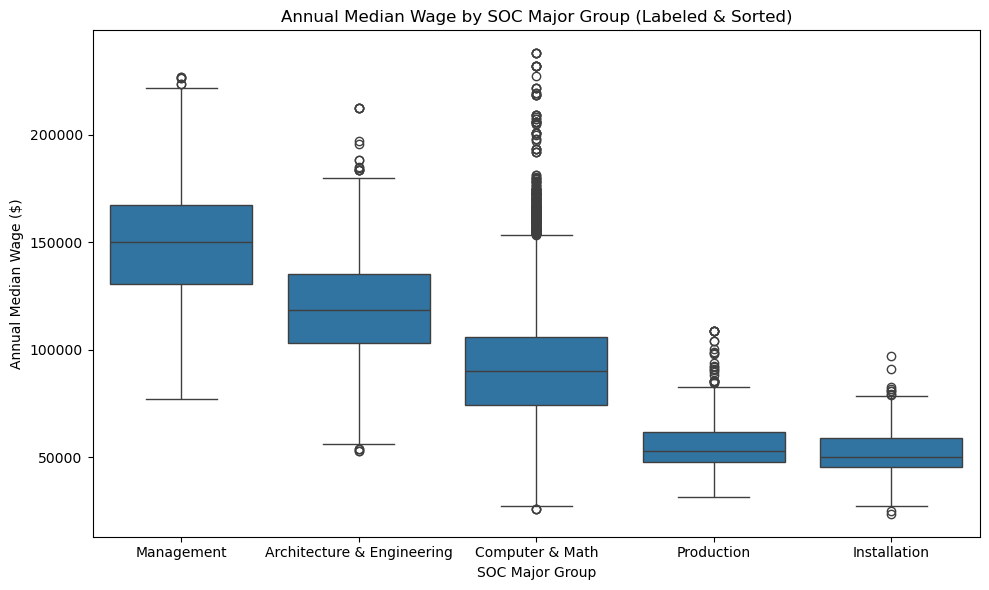

In [40]:
# Map SOC major codes to descriptive group names
soc_labels = {
    '11': 'Management',
    '15': 'Computer & Math',
    '17': 'Architecture & Engineering',
    '49': 'Installation',
    '51': 'Production'
}

# Create a new column with the SOC labels
tech_df_cleaned['SOC_MAJOR'] = tech_df_cleaned['OCC_CODE'].str[:2]
tech_df_cleaned['SOC_LABEL'] = tech_df_cleaned['SOC_MAJOR'].map(soc_labels)

# Filter to just the labeled categories (optional: focus on high-paying groups)
filtered_df = tech_df_cleaned[tech_df_cleaned['SOC_LABEL'].notna()]

# Sort labels by median wage
label_order = (
    filtered_df.groupby('SOC_LABEL')['A_MEDIAN']
    .median()
    .sort_values(ascending=False)
    .index
)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='SOC_LABEL', y='A_MEDIAN', order=label_order)
plt.title('Annual Median Wage by SOC Major Group (Labeled & Sorted)')
plt.xlabel('SOC Major Group')
plt.ylabel('Annual Median Wage ($)')
plt.tight_layout()
plt.show()

### Interpretation: Salary Distribution by SOC Major Group  
This boxplot shows how median annual wages (`A_MEDIAN`) vary across SOC major occupational groups. Management (11) and Computer & Mathematical (15) occupations have the highest median wages and widest distributions, indicating both high pay and variability. In contrast, groups like Installation (49) and Production (51) have lower and more compressed wage ranges.

Understanding these differences helps identify which occupational categories drive higher compensation and highlights SOC major group as a valuable feature for salary prediction.

### Regional Salary Trends Across the U.S.  
To examine geographic salary trends, we calculate the average annual wage (`A_MEAN`) for tech roles by state.  
This allows us to compare how tech compensation varies across different regions in the U.S.

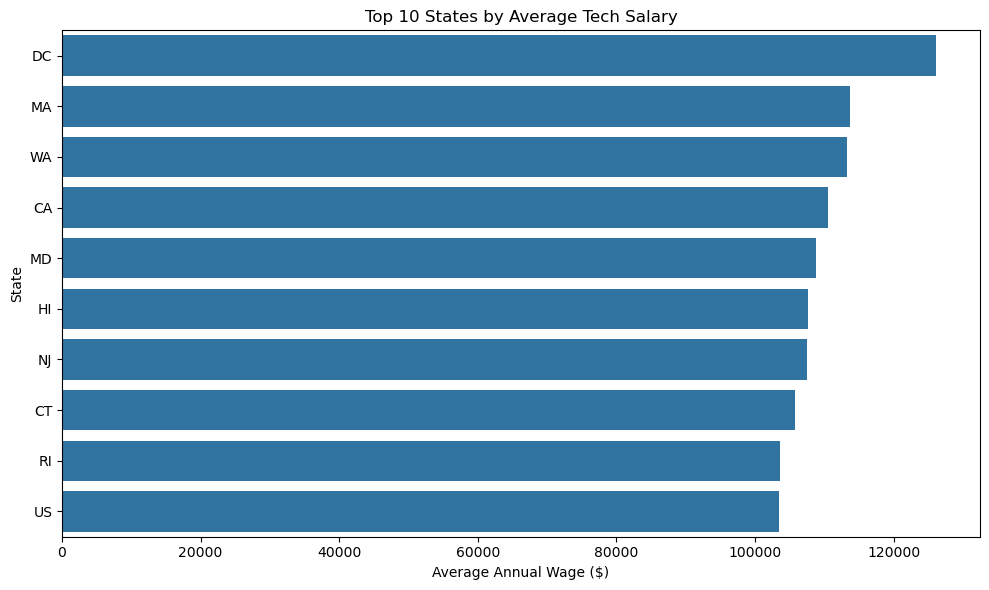

In [41]:
# Calculate average A_MEAN salary by state
state_salary = (
    tech_df_cleaned.groupby('PRIM_STATE')['A_MEAN']
    .mean()
    .sort_values(ascending=False)
)

# Plot top 10 states by average tech salary
plt.figure(figsize=(10, 6))
sns.barplot(x=state_salary.head(10).values, y=state_salary.head(10).index)
plt.title('Top 10 States by Average Tech Salary')
plt.xlabel('Average Annual Wage ($)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### U.S. Tech Salary Map by State  
This interactive choropleth map visualizes the average annual tech salary (`A_MEAN`) across U.S. states.  
Darker shades represent higher average salaries, allowing easy comparison of regional compensation trends at a glance.

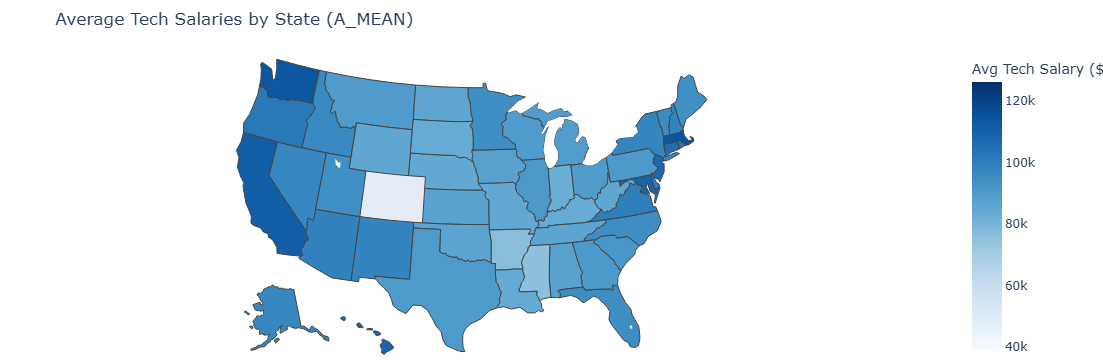

In [43]:
import plotly.express as px
import pandas as pd

# Prepare state-level salary data
state_salary = tech_df_cleaned.groupby('PRIM_STATE')['A_MEAN'].mean().reset_index()
state_salary.columns = ['state', 'average_salary']

# Plot using Plotly
fig = px.choropleth(
    state_salary,
    locations='state',
    locationmode='USA-states',
    color='average_salary',
    scope='usa',
    color_continuous_scale='Blues',
    labels={'average_salary': 'Avg Tech Salary ($)'},
    title='Average Tech Salaries by State (A_MEAN)'
)

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

### Correlation Between Wage Features  
This heatmap visualizes the correlation between different wage-related columns.  
It helps identify which features are closely related, which is useful for model selection and avoiding multicollinearity.

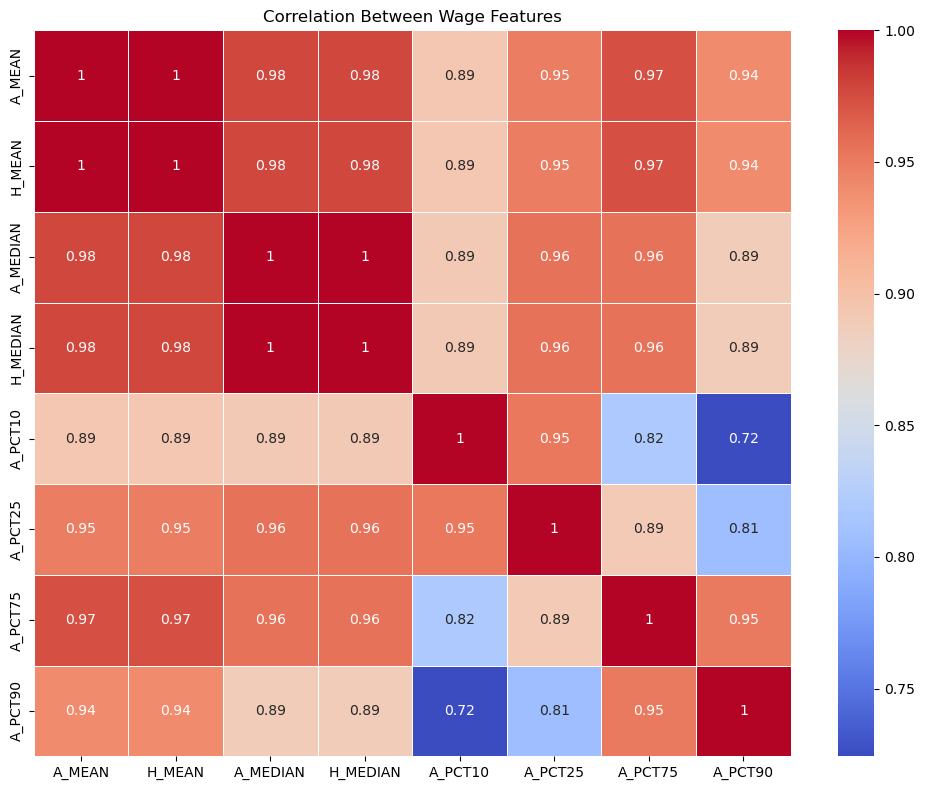

In [44]:
plt.figure(figsize=(10, 8))
wage_corr = tech_df_cleaned[[
    'A_MEAN', 'H_MEAN', 'A_MEDIAN', 'H_MEDIAN',
    'A_PCT10', 'A_PCT25', 'A_PCT75', 'A_PCT90'
]].corr()

sns.heatmap(wage_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Wage Features')
plt.tight_layout()
plt.show()

### Correlation Between Wage Features – Results  
The heatmap reveals very strong positive correlations among most wage metrics.  
Notably:
- `A_MEAN`, `H_MEAN`, `A_MEDIAN`, and `H_MEDIAN` are nearly perfectly correlated (≥ 0.98), indicating that either could serve as a strong central target variable for prediction.
- Percentile metrics like `A_PCT75` and `A_PCT90` also correlate highly with the means and medians.
- `A_PCT10` and `A_PCT25` show slightly weaker correlations, especially with higher percentiles, suggesting some wage compression at the lower end of the salary spectrum.

These results confirm feature redundancy and suggest caution when including all wage columns in modeling to avoid multicollinearity.

### Relationship Between Employment Volume and Salary  
This scatter plot highlights the relationship between total employment (`TOT_EMP`) and median salary (`A_MEDIAN`) for tech roles, showing which jobs are both high-paying and high-demand.

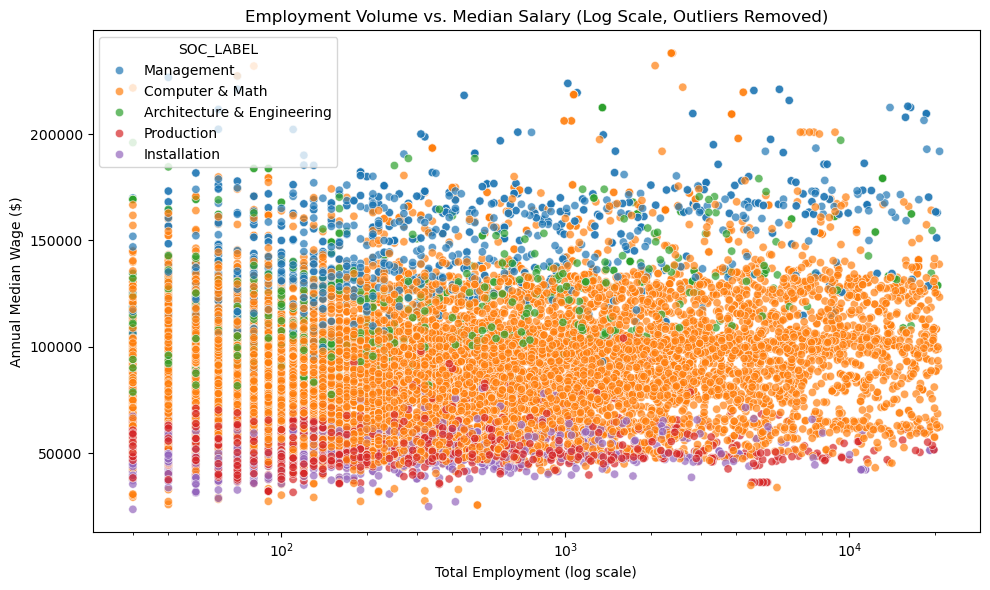

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure numeric types
tech_df_cleaned['TOT_EMP'] = pd.to_numeric(tech_df_cleaned['TOT_EMP'], errors='coerce')
tech_df_cleaned['A_MEDIAN'] = pd.to_numeric(tech_df_cleaned['A_MEDIAN'], errors='coerce')

# Drop rows with missing values
scatter_df = tech_df_cleaned.dropna(subset=['TOT_EMP', 'A_MEDIAN', 'SOC_LABEL'])

# Remove employment outliers (above 95th percentile)
emp_threshold = scatter_df['TOT_EMP'].quantile(0.95)
scatter_df = scatter_df[scatter_df['TOT_EMP'] <= emp_threshold]

# Plot with log scale on x-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=scatter_df,
    x='TOT_EMP',
    y='A_MEDIAN',
    hue='SOC_LABEL',
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.xscale('log')
plt.title('Employment Volume vs. Median Salary (Log Scale, Outliers Removed)')
plt.xlabel('Total Employment (log scale)')
plt.ylabel('Annual Median Wage ($)')
plt.tight_layout()
plt.show()

### Employment Volume vs. Median Salary – Final Results  
This scatterplot illustrates the relationship between total employment and median annual salary (`A_MEDIAN`) across tech roles.  
- A log scale is applied to the x-axis to reduce crowding from lower employment values.
- Roles from the "Computer & Math" category dominate in both representation and employment range.
- "Management" roles tend to cluster at higher wage levels but with fewer positions.
- Outliers were removed (top 5% of `TOT_EMP`) to improve clarity and highlight the general trends.

This visualization helps identify which tech roles balance high compensation with workforce size and suggests key SOC groups for targeted salary modeling.

### Top 10 Tech Occupations by Salary & Employment  
This bubble chart highlights the ten most common tech occupations in the dataset. Each occupation is represented by a uniquely colored bubble, with size indicating total employment and position reflecting average annual salary.  
A legend is provided to map each color to its corresponding occupation, keeping the chart clean and easy to interpret.

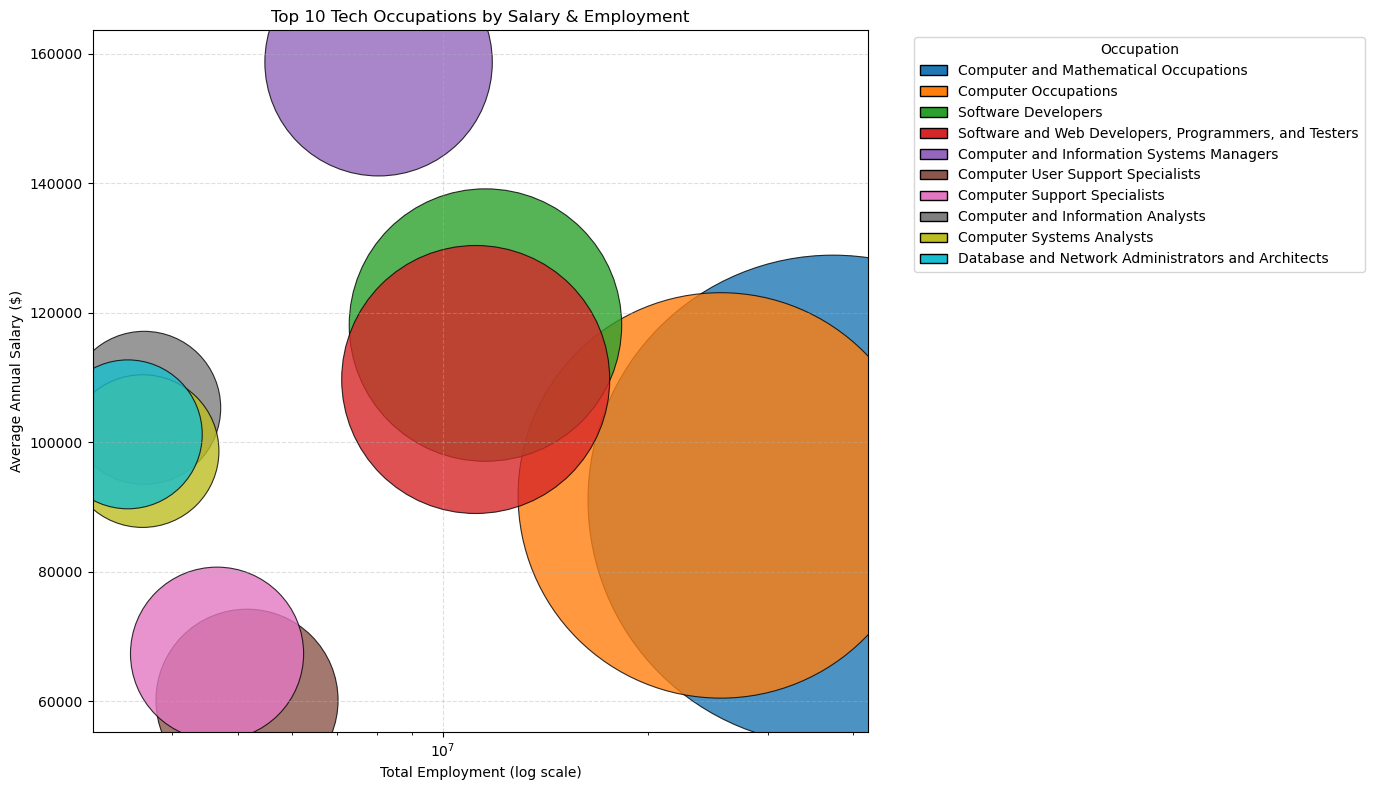

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

# Group and clean data
bubble_df = tech_df_cleaned.groupby('OCC_TITLE').agg({
    'A_MEAN': 'median',
    'TOT_EMP': 'sum'
}).reset_index()

bubble_df = bubble_df.dropna(subset=['A_MEAN', 'TOT_EMP'])
bubble_df = bubble_df[bubble_df['TOT_EMP'] > 0]

# Select top 10 occupations by employment
top10 = bubble_df.sort_values('TOT_EMP', ascending=False).head(10).copy()

# Use 10 distinct colorblind-friendly colors
distinct_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]
top10['Color'] = distinct_colors

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(
    top10['TOT_EMP'],
    top10['A_MEAN'],
    s=top10['TOT_EMP'] / 300,
    c=top10['Color'],
    alpha=0.8,
    edgecolor='black',
    linewidth=0.8
)

# Axes setup
ax.set_xscale('log')
ax.set_title('Top 10 Tech Occupations by Salary & Employment')
ax.set_xlabel('Total Employment (log scale)')
ax.set_ylabel('Average Annual Salary ($)')
ax.grid(True, linestyle='--', alpha=0.4)

# Legend outside plot
legend_patches = [
    Patch(facecolor=color, edgecolor='black', label=occ)
    for color, occ in zip(top10['Color'], top10['OCC_TITLE'])
]
ax.legend(handles=legend_patches, title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Result: Tech Occupations Grouped by Wage and Employment  
This focused bubble chart visualizes the top 10 tech occupations by average annual wage and total employment.  
Each occupation is color-coded distinctly and referenced in the legend for easy identification.  
Bubble size is scaled by workforce size, with roles appearing higher for higher wages and further right for larger employment.  
This simplified view emphasizes clarity while showcasing key differences across high-impact tech roles.

## Feature Engineering

We now select and transform the most relevant features for salary prediction. The target variable is `A_MEAN`, representing the annual mean salary. Categorical features such as `OCC_TITLE` and `NAICS_TITLE` will be encoded to be used in regression models. Employment (`TOT_EMP`) will be retained as a numeric predictor.